<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/7506R_TP1_GRUPO24_CHP2_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 1: Reservas de Hotel

## 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

      ➢ Torraca Lautaro - 108813
      ➢ Negrotti Gianluca - 108184
      ➢ Marco Tosi - 107237

### » Imports

In [1151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from google.colab import files


from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# » Lectura de los archivos

In [1152]:
url_train = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_train.csv'
url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/test_limpio%20-%20ds_unificado.csv'

ds_train_base = pd.read_csv(url_train)
ds_test_base = pd.read_csv(url_test)

ds_test = ds_test_base.copy()
df_test = pd.DataFrame(ds_test_base)

ds_train = ds_train_base.copy()
df_train = pd.DataFrame(ds_train_base)

# » Analisis del DataSet de train


Realizamos un breve analizis sobre el dataset para ver valores atipicos y/o valores nulos los cuales no queremos tenerlos en cuenta.

### » Muestra del DataSet de Train


In [1153]:
ds_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


#### - **Cantidad de columnas y filas**

In [1154]:
ds_train.shape

(61913, 31)

### » Tipos de las varibales

In [1155]:
ds_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

### » Separación de variables cuantitativas

In [1156]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = ds_train.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.25,78.0,0.0,629.0
arrival_date_week_number,27.22,28.0,33.0,53.0
stays_in_weekend_nights,0.92,1.0,0.0,16.0
adults,1.86,2.0,2.0,55.0
children,0.10,0.0,0.0,10.0
babies,0.01,0.0,0.0,9.0
is_repeated_guest,0.03,0.0,0.0,1.0
previous_cancellations,0.11,0.0,0.0,26.0
previous_bookings_not_canceled,0.12,0.0,0.0,70.0
booking_changes,0.20,0.0,0.0,17.0


### » Separación de las variables cualitativas

In [1157]:
nombre_variables_cualitativas = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'reserved_room_type', 'distribution_channel', 'assigned_room_type',
                                 'deposit_type', 'customer_type']

ds_cualitativo = ds_train.loc[:, nombre_variables_cualitativas]

### » Cantidad de valores que admiten las varibles cualitativas.

In [1158]:
ds_cualitativo.nunique().sort_values(ascending=True)

hotel                     2
deposit_type              3
customer_type             4
meal                      5
distribution_channel      5
market_segment            8
reserved_room_type       10
arrival_date_month       12
assigned_room_type       12
country                 149
dtype: int64

### » Frecuencia de los valores

- **Hoteles.**

In [1159]:
round(ds_cualitativo.hotel.value_counts(normalize=True) * 100, 2)

City Hotel      68.05
Resort Hotel    31.95
Name: hotel, dtype: float64


- **Tipo de depósito.**

In [1160]:
round(ds_cualitativo.deposit_type.value_counts(normalize=True) * 100, 2)

No Deposit    83.48
Non Refund    16.39
Refundable     0.13
Name: deposit_type, dtype: float64

tiene Undefined


- **Canal de distribución.**

In [1161]:
round(ds_cualitativo.distribution_channel.value_counts(normalize=True) * 100, 2)

TA/TO        83.74
Direct       10.98
Corporate     5.12
GDS           0.14
Undefined     0.01
Name: distribution_channel, dtype: float64

- **Tipo de cliente.**

In [1162]:
round(ds_cualitativo.customer_type.value_counts(normalize=True) * 100, 2)

Transient          76.64
Transient-Party    19.65
Contract            3.28
Group               0.42
Name: customer_type, dtype: float64

- **Comida.**

In [1163]:
round(ds_cualitativo.meal.value_counts(normalize=True) * 100, 2)

BB           77.26
HB           12.04
SC            8.97
Undefined     0.95
FB            0.77
Name: meal, dtype: float64

tiene Undefined

- **Segmento de mercado (método de reserva).**

In [1164]:
round(ds_cualitativo.market_segment.value_counts(normalize=True) * 100, 3)

Online TA        47.274
Offline TA/TO    20.002
Groups           18.647
Direct            9.299
Corporate         4.012
Complementary     0.580
Aviation          0.183
Undefined         0.003
Name: market_segment, dtype: float64

- **Mes de llegada**

In [1165]:
round(ds_cualitativo.arrival_date_month.value_counts(normalize=True) * 100, 2)

August       11.59
July         10.54
May           9.95
April         9.49
October       9.47
June          9.32
September     9.08
March         7.91
February      6.66
December      5.64
November      5.50
January       4.85
Name: arrival_date_month, dtype: float64

- **País**

In [1166]:
ds_cualitativo.country.value_counts(normalize=True) * 100

PRT    45.305712
GBR     9.292939
FRA     7.795176
ESP     6.824224
DEU     5.368605
         ...    
HND     0.001621
FJI     0.001621
LIE     0.001621
ATA     0.001621
RWA     0.001621
Name: country, Length: 149, dtype: float64

### » Separacion de las variables ordinales

In [1167]:
nombre_variables_ordinales = ['reserved_room_type', 'assigned_room_type']

ds_ordinales = ds_train.loc[:, nombre_variables_ordinales]

- **Tipo de habitación reservada.**

In [1168]:
round(ds_ordinales.reserved_room_type.value_counts(normalize=True) * 100, 3)

A    72.899
D    15.481
E     5.248
F     2.344
G     1.761
B     0.937
C     0.779
H     0.539
P     0.011
L     0.002
Name: reserved_room_type, dtype: float64

- **Tipo de habitación asignada**

In [1169]:
round(ds_ordinales.assigned_room_type.value_counts(normalize=True) * 100, 3)

A    64.618
D    19.689
E     6.104
F     2.941
G     2.063
C     1.820
B     1.706
H     0.620
I     0.234
K     0.192
P     0.011
L     0.002
Name: assigned_room_type, dtype: float64

# » Analisis de nulos en el DataSet

In [1170]:
ds_train.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


# » Valores atipicos e imputaciones.


Luego de analizar los valores mostrados anteriormente procedemos a eliminar los valores que consideramos como outsiders.

In [1171]:
df_train.shape

(61913, 31)

- **Adulto**

In [1172]:
df_train = df_train[(df_train['adults'] <= 6) & (df_train['adults'] >= 1)]
df_train.shape

(61708, 31)

- **Hijos**


In [1173]:
df_train = df_train[(df_train['children'] <= 4) & (df_train['children'] >= 0)]
df_train.shape

(61703, 31)

- **Bebes**

Filtrado de los datos

In [1174]:
df_train = df_train[(df_train['babies'] <= 3) & (df_train['babies'] >= 0)]
df_train.shape

(61702, 31)

- **Playas de estacionamientos**

In [1175]:
df_train = df_train[(df_train['required_car_parking_spaces'] <= 3) & (df_train['required_car_parking_spaces'] >= 0)]
df_train.shape

(61701, 31)

## - **Muestra del DataSet limpio**

In [1176]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = df_train.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.27,78.0,0.0,629.0
arrival_date_week_number,27.21,28.0,33.0,53.0
stays_in_weekend_nights,0.92,1.0,0.0,16.0
adults,1.87,2.0,2.0,6.0
children,0.10,0.0,0.0,3.0
babies,0.01,0.0,0.0,2.0
is_repeated_guest,0.03,0.0,0.0,1.0
previous_cancellations,0.12,0.0,0.0,26.0
previous_bookings_not_canceled,0.12,0.0,0.0,70.0
booking_changes,0.19,0.0,0.0,17.0


### » Ingeniería de Features

In [1177]:
ds_trabajo_train = ds_train.copy()
ds_trabajo_test = ds_test.copy()

df_trabajo_train = pd.DataFrame(ds_trabajo_train)
df_trabajo_test = pd.DataFrame(ds_trabajo_test)

In [1178]:
df_trabajo_test.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [1179]:
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}


In [1180]:
df_trabajo_train['total_guests'] = df_trabajo_train['adults'] + df_trabajo_train['children']
df_trabajo_test['total_guests'] = df_trabajo_test['adults'] + df_trabajo_test['children']

df_trabajo_train['room_type_match'] = df_trabajo_train['assigned_room_type'] == df_trabajo_train['reserved_room_type']
df_trabajo_test['room_type_match'] = df_trabajo_test['assigned_room_type'] == df_trabajo_test['reserved_room_type']

df_trabajo_train['days_in_waiting_list'] = ds_trabajo_train['days_in_waiting_list'] >= 0

df_trabajo_train['cancel_to_noncancel_ratio'] = df_trabajo_train['previous_cancellations'] / (1 + df_trabajo_train['previous_bookings_not_canceled'])
df_trabajo_test['cancel_to_noncancel_ratio'] = df_trabajo_test['previous_cancellations'] / (1 + df_trabajo_test['previous_bookings_not_canceled'])

df_trabajo_train['lead_time_category'] = pd.cut(df_trabajo_train['lead_time'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)
df_trabajo_test['lead_time_category'] = pd.cut(df_trabajo_test['lead_time'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)

df_trabajo_train['days_in_waiting_list_category'] = pd.cut(df_trabajo_train['days_in_waiting_list'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)
df_trabajo_test['days_in_waiting_list_category'] = pd.cut(df_trabajo_test['days_in_waiting_list'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)

In [1181]:
df_trabajo_test['arrival_date_month'] = df_trabajo_test['arrival_date_month'].map(month_to_number)
df_trabajo_train['arrival_date_month'] = df_trabajo_train['arrival_date_month'].map(month_to_number)

In [1182]:
df_trabajo_test['Fecha'] = df_trabajo_test.apply(lambda row: str(row['arrival_date_year']) + '-' + str(row['arrival_date_month']) + '-' + str(row['arrival_date_day_of_month']), axis=1)
df_trabajo_test['Fecha'] = pd.to_datetime(df_trabajo_test['Fecha'])

In [1183]:
df_trabajo_test['DoY'] = df_trabajo_test['Fecha'].dt.dayofyear
#df_test['Valueofday'] = min((365 - df_test['DoY']), (df_test['DoY'] - 1))
df_trabajo_train['Fecha'] = df_trabajo_train.apply(lambda row: str(row['arrival_date_year']) + '-' + str(row['arrival_date_month']) + '-' + str(row['arrival_date_day_of_month']), axis=1)
df_trabajo_train['Fecha'] = pd.to_datetime(df_trabajo_train['Fecha'])

df_trabajo_train['DoY'] = df_trabajo_train['Fecha'].dt.dayofyear

df_trabajo_train['dif'] = df_trabajo_train['DoY'].apply(lambda x: min((366 - x), (x - 1)))
df_trabajo_test['dif'] = df_trabajo_test['DoY'].apply(lambda x: min((366 - x), (x - 1)))

df_trabajo_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,id,is_canceled,total_guests,room_type_match,cancel_to_noncancel_ratio,lead_time_category,days_in_waiting_list_category,Fecha,DoY,dif
0,City Hotel,49,2016,9,37,5,1,2,1,0.0,...,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,1.0,True,0.0,Short,Very Short,2016-09-05,249,117
1,Resort Hotel,4,2015,10,44,31,0,1,2,0.0,...,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,2.0,True,0.0,Very Short,Very Short,2015-10-31,304,62
2,City Hotel,25,2016,10,42,13,0,1,2,2.0,...,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,4.0,True,0.0,Short,Very Short,2016-10-13,287,79
3,City Hotel,26,2016,12,51,12,2,5,2,0.0,...,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,2.0,True,0.0,Short,Very Short,2016-12-12,347,19
4,City Hotel,104,2017,3,12,19,2,5,2,0.0,...,28c75445-c603-413a-babf-ad377018b592,0,2.0,True,0.0,Long,Very Short,2017-03-19,78,77


# »  Preparacion de los DataSets

Procedemos a preparar ambos DataSets para poder entrenar y predecir.

- Analizamos la cantidad de columnas y filas



In [1184]:
print('Train:', df_trabajo_train.shape)
print('Test:', df_trabajo_test.shape)

Train: (61913, 39)
Test: (26535, 39)


Buscamos las columans que no coinciden en ambos DataSets


In [1185]:
columnas_faltantes_en_train = set(df_trabajo_test.columns) - set(df_trabajo_train.columns)
columnas_faltantes_en_test = set(df_trabajo_train.columns)- set(df_trabajo_test.columns)
print('Columnas faltantes es train:', columnas_faltantes_en_train)
print('Columnas faltantes es test:', columnas_faltantes_en_test)

Columnas faltantes es train: {'reservation_status_date'}
Columnas faltantes es test: {'is_canceled'}


Vemos que el dataSet de test tiene una columan de mas que no se encuentra en train, por lo que prodecemos a eliminarla ya que creemos que no es relevante para el calculo del is_canceled.



#### - **Arreglo del DataSet de test**

Debemos eliminar las columnas que unicamenten faltan el train y agregar las que faltan en test ya que deben tener las mismas columnas con los mismos nombres.

In [1186]:
columna_a_eliminar_test = 'reservation_status_date'

df_trabajo_test.drop(columna_a_eliminar_test, axis='columns', inplace = True)
df_trabajo_test.insert(1, 'is_canceled', " ")
df_trabajo_test = pd.DataFrame(df_trabajo_test)
df_trabajo_test.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,id,total_guests,room_type_match,cancel_to_noncancel_ratio,lead_time_category,days_in_waiting_list_category,Fecha,DoY,dif
0,City Hotel,,277,2016,11,46,7,1,2,2,...,0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,2.0,True,0.0,Long,Very Short,2016-11-07,312,54
1,City Hotel,,286,2016,5,20,11,0,4,2,...,0,aba9aac2-4495-4645-a60e-90328713c999,2.0,True,0.0,Long,Long,2016-05-11,132,131
2,City Hotel,,0,2016,8,35,23,0,1,3,...,2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,3.0,True,0.0,Very Short,Very Short,2016-08-23,236,130
3,Resort Hotel,,196,2016,10,44,29,2,5,2,...,0,ce1b400e-afa1-4946-bdff-004b859eb61c,4.0,True,0.0,Long,Very Short,2016-10-29,303,63
4,Resort Hotel,,232,2016,11,48,26,2,1,2,...,0,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,2.0,True,0.0,Long,Very Short,2016-11-26,331,35


### - **Seleccion de columnas utiles para la prediccion**

- Buscamos datos faltantes y procedemos a tomar decisiones sobre que hacer con estos datos faltantes

In [1187]:
filas_totales=ds_trabajo_train.shape[0]
print(ds_trabajo_train.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

In [1188]:
df_trabajo_train.shape

(61913, 39)

In [1189]:
df_trabajo_train.dropna(subset=['children'], inplace=True)
df_trabajo_train.dropna(subset=['country'], inplace=True)

# df_trabajo_train.dropna(subset=['agent'], inplace=True)

# df_trabajo_train['agent'] = df_trabajo_train['agent'].notna().astype(int)
# df_trabajo_test['agent'] = ds_trabajo_test['agent'].apply(lambda x: 0 if x == 'not applicable' else 1)

# df_trabajo_train['company'] = df_trabajo_train['company'].notna().astype(int)
# df_trabajo_test['company'] = ds_trabajo_test['company'].apply(lambda x: 0 if x == 'not applicable' else 1)
df_trabajo_train.shape



(61688, 39)

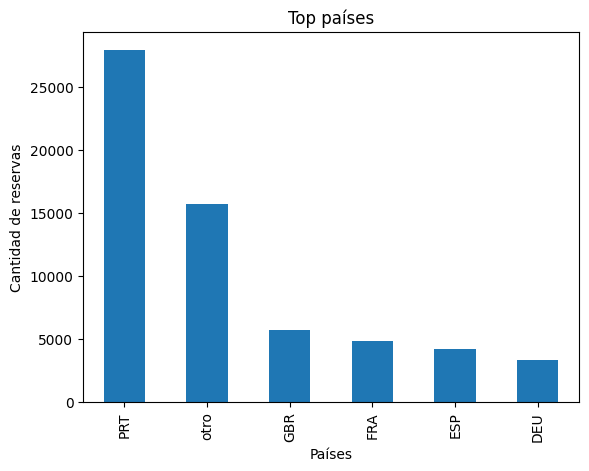

In [1190]:
country_counts_train = df_trabajo_train['country'].value_counts()
country_counts_test = df_trabajo_test['country'].value_counts()

# Selecciona los 10 países más relevantes
top_10_countries_train = country_counts_train.head(10).index.tolist()
top_10_countries_test = country_counts_test.head(10).index.tolist()

# Reemplaza los países que no están en los 10 más relevantes con "otro"
df_trabajo_train['country'] = df_trabajo_train['country'].apply(lambda x: x if x in top_10_countries_train else 'otro')
df_trabajo_test['country'] = df_trabajo_test['country'].apply(lambda x: x if x in top_10_countries_test else 'otro')

paises = df_trabajo_train['country'].value_counts().plot.bar(alpha=1, title="Top países", xlabel='Países', ylabel='Cantidad de reservas')

Verificamos la existencia de NaNs de nuevo.

In [1191]:
filas_totales = df_trabajo_train.shape[0]
print(df_trabajo_train.isna().sum()/filas_totales*100)


hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

» Matriz de correlacion

Sera utilizada para analizar posibles columnas utiles para el calculo de la columnas is_canceled

<Axes: >

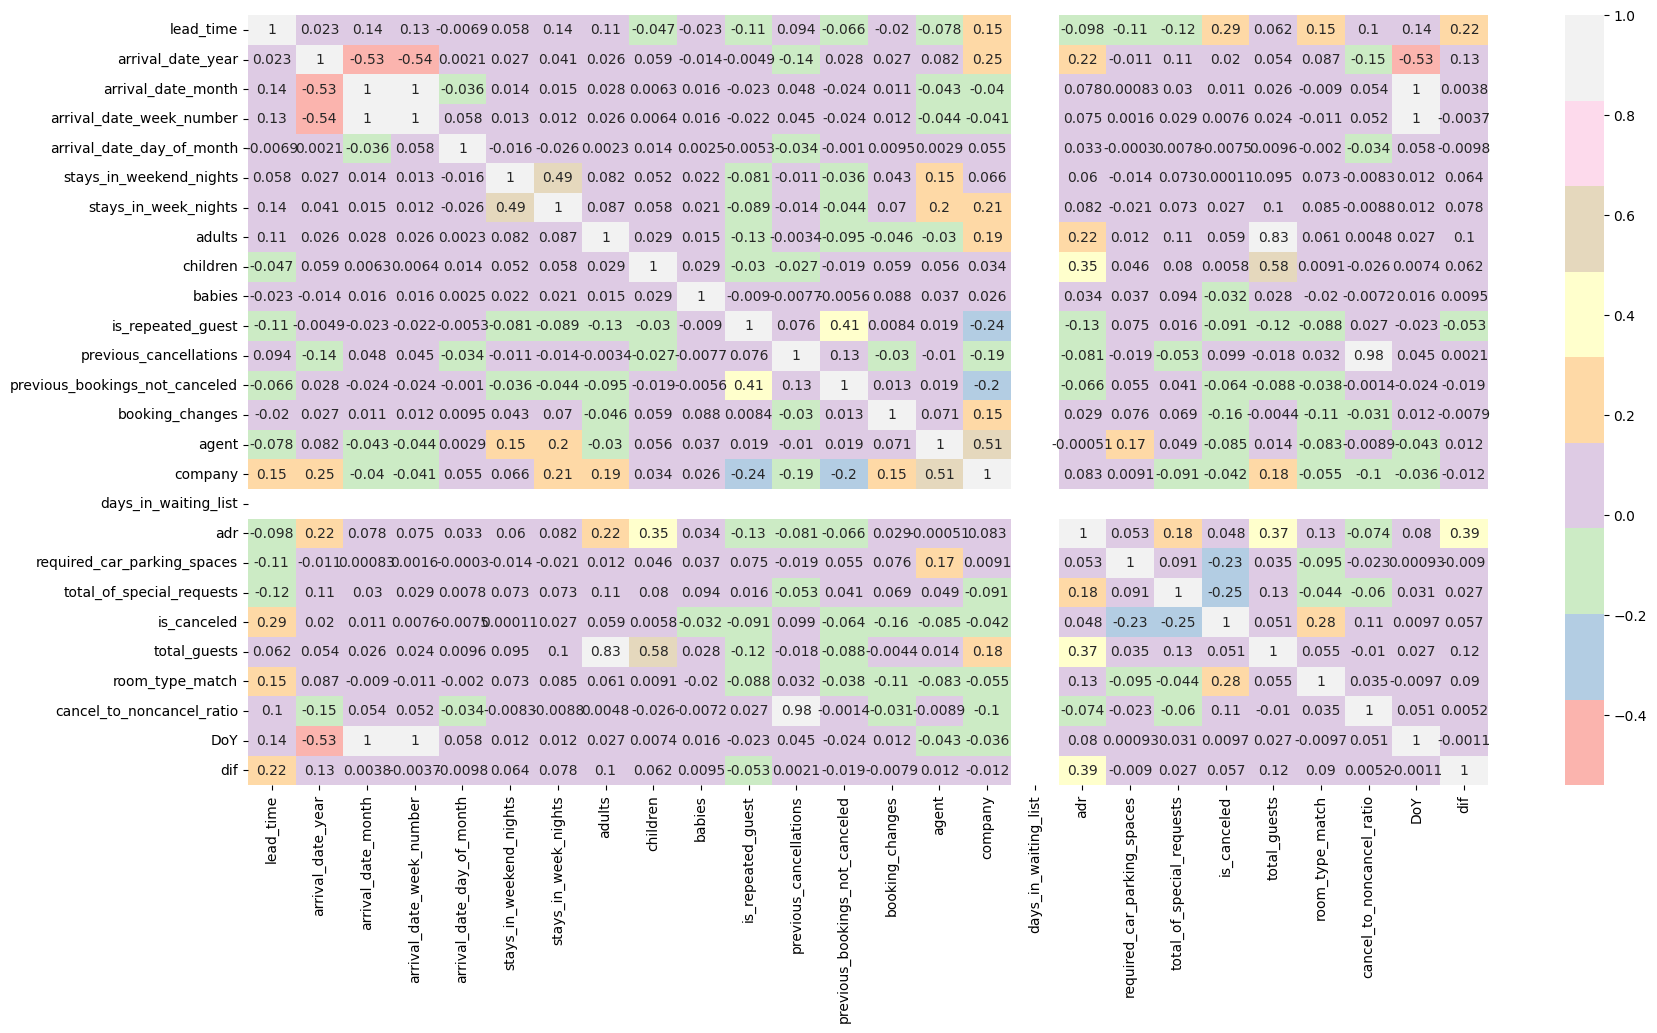

In [1192]:
df_trabajo_train.corr(numeric_only = True)
plt.figure(figsize = (20,10))
sns.heatmap(df_trabajo_train.corr(numeric_only = True),annot = True, cmap= "Pastel1")

In [1193]:


# Supongamos que tienes un DataFrame con las columnas categóricas especificadas llamado df_trabajo_train
# Reemplaza esto con tus propios datos

# Selecciona las columnas categóricas
columnas_categoricas = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                        'reserved_room_type', 'distribution_channel', 'assigned_room_type',
                        'deposit_type', 'customer_type', 'lead_time_category','is_canceled']

# Crea una matriz de contingencia para cada par de columnas categóricas
matriz_de_contingencia = pd.DataFrame(index=columnas_categoricas, columns=columnas_categoricas)

for col1 in columnas_categoricas:
    for col2 in columnas_categoricas:
        contingency_table = pd.crosstab(df_trabajo_train[col1], df_trabajo_train[col2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = min(contingency_table.shape)
        coefficient = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        matriz_de_contingencia.loc[col1, col2] = coefficient

# Imprime la matriz de correlación de variables categóricas
print("Matriz de correlación de variables categóricas:")
print(matriz_de_contingencia)

Matriz de correlación de variables categóricas:
                           hotel arrival_date_month       meal    country  \
hotel                 175.618029          12.087485  57.262433  38.805357   
arrival_date_month     12.087485          71.698443  10.443483   7.484512   
meal                   57.262433          10.443483  111.07475  14.204906   
country                38.805357           7.484512  14.204906  101.39691   
market_segment         25.075437           9.112404  21.313458  22.447407   
reserved_room_type     59.377909           3.769981  11.420961  10.402927   
distribution_channel   32.104964           9.400248  10.397086  10.734155   
assigned_room_type     69.403156           2.143398  12.334394   9.672185   
deposit_type           34.030813          16.001097  15.485188   47.21325   
customer_type           6.454037          12.746749   17.11995  12.130448   
lead_time_category      19.07217          18.968112   9.291958  11.848722   
is_canceled            24.55

### » Entramiento y prediccion con el primer modelo de arbol planteado. (Modelo 1)

- **Agregamos, eliminamos y modificamos valores para que esten en ambos DataSets**


 Analizando los graficos del CHP1 y la cantidad de valores que admiten las variables observamos que tanto country como assigned_room_type tiene valores que no se encuentran en ambos DataSets.

Procedemos a buscar los paises que se encuentran en ambos DataSets y hacemos que coincidan los de train con los de test.

In [1194]:
df_trabajo_train.shape

(61688, 39)

In [1195]:

features1 = ['lead_time_category','booking_changes','required_car_parking_spaces','total_of_special_requests','room_type_match','cancel_to_noncancel_ratio', 'is_repeated_guest',
             'previous_cancellations','country', 'market_segment', 'deposit_type',
             'is_canceled','id']

df_trabajo_train1 = df_trabajo_train[features1]
df_trabajo_test1 = df_trabajo_test[features1]

- **Dummies a las columnas de los DataSets**

In [1196]:
columns_to_dum1= ['lead_time_category', 'country', 'market_segment', 'deposit_type']

In [1197]:
df_trabajo_train_dum1 = pd.get_dummies(df_trabajo_train1, columns = columns_to_dum1 )
df_trabajo_train_dum1.head(5)

,booking_changes,required_car_parking_spaces,total_of_special_requests,room_type_match,cancel_to_noncancel_ratio,is_repeated_guest,previous_cancellations,is_canceled,id,lead_time_category_Very Short,...,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,1,True,0.0,0,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,0,...,0,0,0,0,0,0,1,1,0,0
1,0,1,0,True,0.0,0,0,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,1,...,0,0,0,0,1,0,0,1,0,0
2,0,0,2,True,0.0,0,0,0,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,True,0.0,0,0,1,314f56dc-2e4d-4298-9bdd-27bb008bffff,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,True,0.0,0,0,0,28c75445-c603-413a-babf-ad377018b592,0,...,0,0,0,0,0,1,0,1,0,0


In [1198]:
df_trabajo_test_dum1 = pd.get_dummies(df_trabajo_test1, columns = columns_to_dum1 )
df_trabajo_test_dum1.head()

,booking_changes,required_car_parking_spaces,total_of_special_requests,room_type_match,cancel_to_noncancel_ratio,is_repeated_guest,previous_cancellations,is_canceled,id,lead_time_category_Very Short,...,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,0,True,0.0,0,0,,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,True,0.0,0,0,,aba9aac2-4495-4645-a60e-90328713c999,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,2,True,0.0,0,0,,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,True,0.0,0,0,,ce1b400e-afa1-4946-bdff-004b859eb61c,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,True,0.0,0,0,,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,0,...,0,0,0,0,1,0,0,0,1,0


- **Entrenamiento del arbol1**

In [1199]:

df_trabajo_x1= df_trabajo_train_dum1.drop(['is_canceled', 'id'], axis='columns', inplace=False)

df_trabajo_y1 = df_trabajo_train_dum1['is_canceled'].copy()

x_train1, x_test1, y_train1, y_test1= train_test_split(df_trabajo_x1,
                                                       df_trabajo_y1,
                                                       test_size=0.30,
                                                       random_state=13)


In [1200]:
tree_model1 = tree.DecisionTreeClassifier(criterion = 'gini',
                                          max_depth = 25,
                                          min_samples_leaf = 10,
                                          ccp_alpha = 0)

In [1201]:
model1 = tree_model1.fit(X = x_train1, y = y_train1)

y_pred1 = model1.predict(x_test1)


- **Muestra de la matris de confusion**

Text(50.722222222222214, 0.5, 'True')

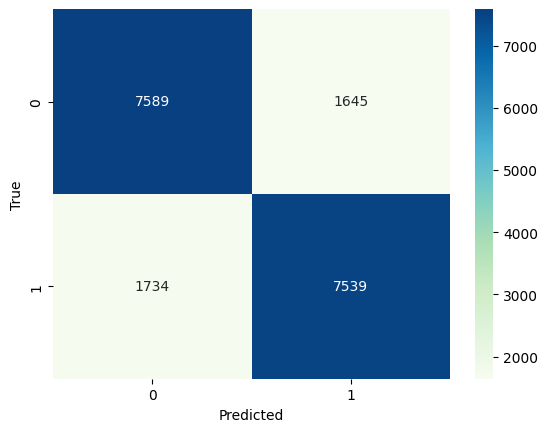

In [1202]:
tabla1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(tabla1,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')


- **Calculo de las metricas**

In [1203]:
def mostrar_metricas(y_test, y_pred):
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    print("Accuracy: "+str(accuracy))
    print("Recall: "+str(recall))
    print("Precision: "+str(precision))
    print("f1 score: "+str(f1))

In [1204]:
mostrar_metricas(y_test1, y_pred1)

Accuracy: 0.8174204355108877
Recall: 0.81300549983824
Precision: 0.8208841463414634
f1 score: 0.8169258275992848


- Prediccion con el dataset de Test

In [1205]:

df_trabajo_test_x1 = df_trabajo_test_dum1.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids1 = df_trabajo_test_dum1['id'].copy()


prediccion1 = model1.predict(df_trabajo_test_x1)

df_prediccion1 = pd.DataFrame({'id': ids1, 'is_canceled': prediccion1})

df_prediccion1.to_csv('df_prediccion1.csv')
files.download('df_prediccion1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Grafico (arreglar func y cortar arbol)

In [1206]:
# #Grafico
# dot_data = StringIO()
# export_graphviz(mejor_performance, out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True,
#                 feature_names=df_split_test3.columns.to_list(),
#                 class_names=['is_canceled','is_not_canceled'])

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

- Analisis de la importancia de cada feature en al hora de al prediccion

In [1207]:
sorted(list(zip(df_trabajo_test_dum1.columns.to_list(), model1.feature_importances_)), key=lambda x: -x[1])

[('market_segment_Online TA', 0.36524212921710014),
 ('market_segment_Groups', 0.14736131754719464),
 ('room_type_match', 0.09411091546928095),
 ('total_of_special_requests', 0.0875454511056307),
 ('country_FRA', 0.07901340469999556),
 ('is_canceled', 0.06711035461677048),
 ('required_car_parking_spaces', 0.05773075701404927),
 ('cancel_to_noncancel_ratio', 0.029486379180519953),
 ('booking_changes', 0.023542019292075517),
 ('lead_time_category_Short', 0.007677472530457582),
 ('market_segment_Complementary', 0.007670925648997839),
 ('is_repeated_guest', 0.00638427500234502),
 ('id', 0.004664171616577536),
 ('lead_time_category_Long', 0.003796577535921652),
 ('lead_time_category_Very Long', 0.003705445801915338),
 ('market_segment_Corporate', 0.0034882341337802132),
 ('country_GBR', 0.0025998949998698867),
 ('lead_time_category_Very Short', 0.00227580229565031),
 ('market_segment_Direct', 0.001761806865575883),
 ('country_DEU', 0.0014778218537438647),
 ('market_segment_Aviation', 0.0011

### » Entramiento y prediccion con el segundo modelo de arbol planteado. (Modelo 2, Split)

In [1208]:


features2 =  ['lead_time_category','booking_changes','required_car_parking_spaces','total_of_special_requests','room_type_match','cancel_to_noncancel_ratio', 'is_repeated_guest',
             'previous_cancellations','country', 'market_segment', 'deposit_type',
             'is_canceled','id']
df_split_train2 = df_trabajo_train[features2]
df_split_test2= df_trabajo_test[features2]


features_to_dum2= ['lead_time_category', 'country', 'market_segment', 'deposit_type']

target2 = 'is_canceled'


In [1209]:
# unique_values_in_test = set(df_split_test2['assigned_room_type'].unique())
# unique_values_in_train = set(df_split_train2['assigned_room_type'].unique())

# values_to_replace_test = unique_values_in_test - unique_values_in_train
# values_to_replace_train = unique_values_in_train - unique_values_in_test

# mode_in_test = df_split_test2['assigned_room_type'].mode()[0]

# for value in values_to_replace_test:
#     df_split_test2.loc[df_split_test2['assigned_room_type'] == value, 'assigned_room_type'] = mode_in_test

# for value in values_to_replace_train:
#     df_split_train2.loc[df_split_train2['assigned_room_type'] == value, 'assigned_room_type'] = mode_in_test

- Verificacion del balanceo de clases

In [1210]:
df_split_train2[target2].value_counts(normalize=True)*100

1    50.071327
0    49.928673
Name: is_canceled, dtype: float64

- Evaluacion del dataset

In [1211]:

df_split_train_dum2 = pd.get_dummies(df_split_train2[features2], columns = features_to_dum2)
df_split_test_dum2 = pd.get_dummies(df_split_test2[features2], columns = features_to_dum2)

x_train2, x_test2, y_train2, y_test2 = train_test_split(df_split_train_dum2.drop(['id', 'is_canceled'], axis=1).values,
                                                     df_split_train2[target2].values,
                                                     test_size=0.3,
                                                     random_state=13,
                                                     stratify=df_split_train2[target2].values)



In [1212]:

print('# Datos Entrenamiento: {}'.format(len(x_train2)))
print('# Datos Prueba: {}'.format(len(x_test2)))

for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train2,y_test2]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))


# Datos Entrenamiento: 43181
# Datos Prueba: 18507
% Positivos Entrenamiento: 50.071
% Positivos Prueba: 50.073


Text(50.722222222222214, 0.5, 'True')

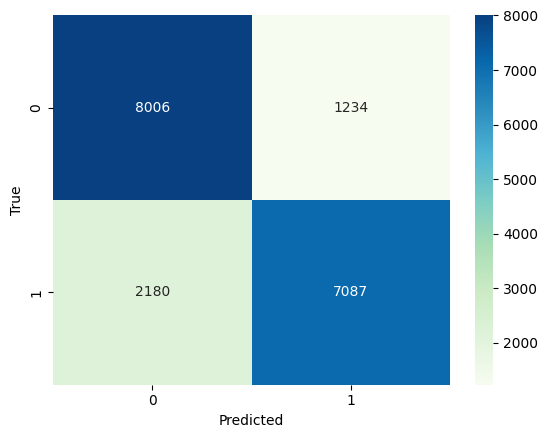

In [1213]:

tree_model2 = tree.DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = 13,
                                        min_samples_leaf = 6,
                                        ccp_alpha = 0.001,
                                        min_samples_split= 36)


model2 = tree_model2.fit(X = x_train2, y = y_train2)
y_pred2 = model2.predict(x_test2)


tabla2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(tabla2,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')


In [1214]:
mostrar_metricas(y_test2, y_pred2)

Accuracy: 0.8155292591992219
Recall: 0.7647566634293731
Precision: 0.851700516764812
f1 score: 0.8058903798044121


In [1215]:
df_split_test2 = df_split_test_dum2.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids2 = df_split_test_dum2['id'].copy()

columnas_faltantes_en_train = set(df_split_test_dum2.columns) - set(df_split_train_dum2.columns)
columnas_faltantes_en_test = set(df_split_train_dum2.columns)- set(df_split_test_dum2.columns)

print('Columnas faltantes es train:', columnas_faltantes_en_train)
print('Columnas faltantes es test:', columnas_faltantes_en_test)

prediccion2 = model2.predict(df_split_test2)

df_prediccion2 = pd.DataFrame({'id': ids2, 'is_canceled': prediccion2})

# df_prediccion2.to_csv('df_prediccion2.csv')
# files.download('df_prediccion2.csv')

Columnas faltantes es train: set()
Columnas faltantes es test: set()


## » Muestra del arbol

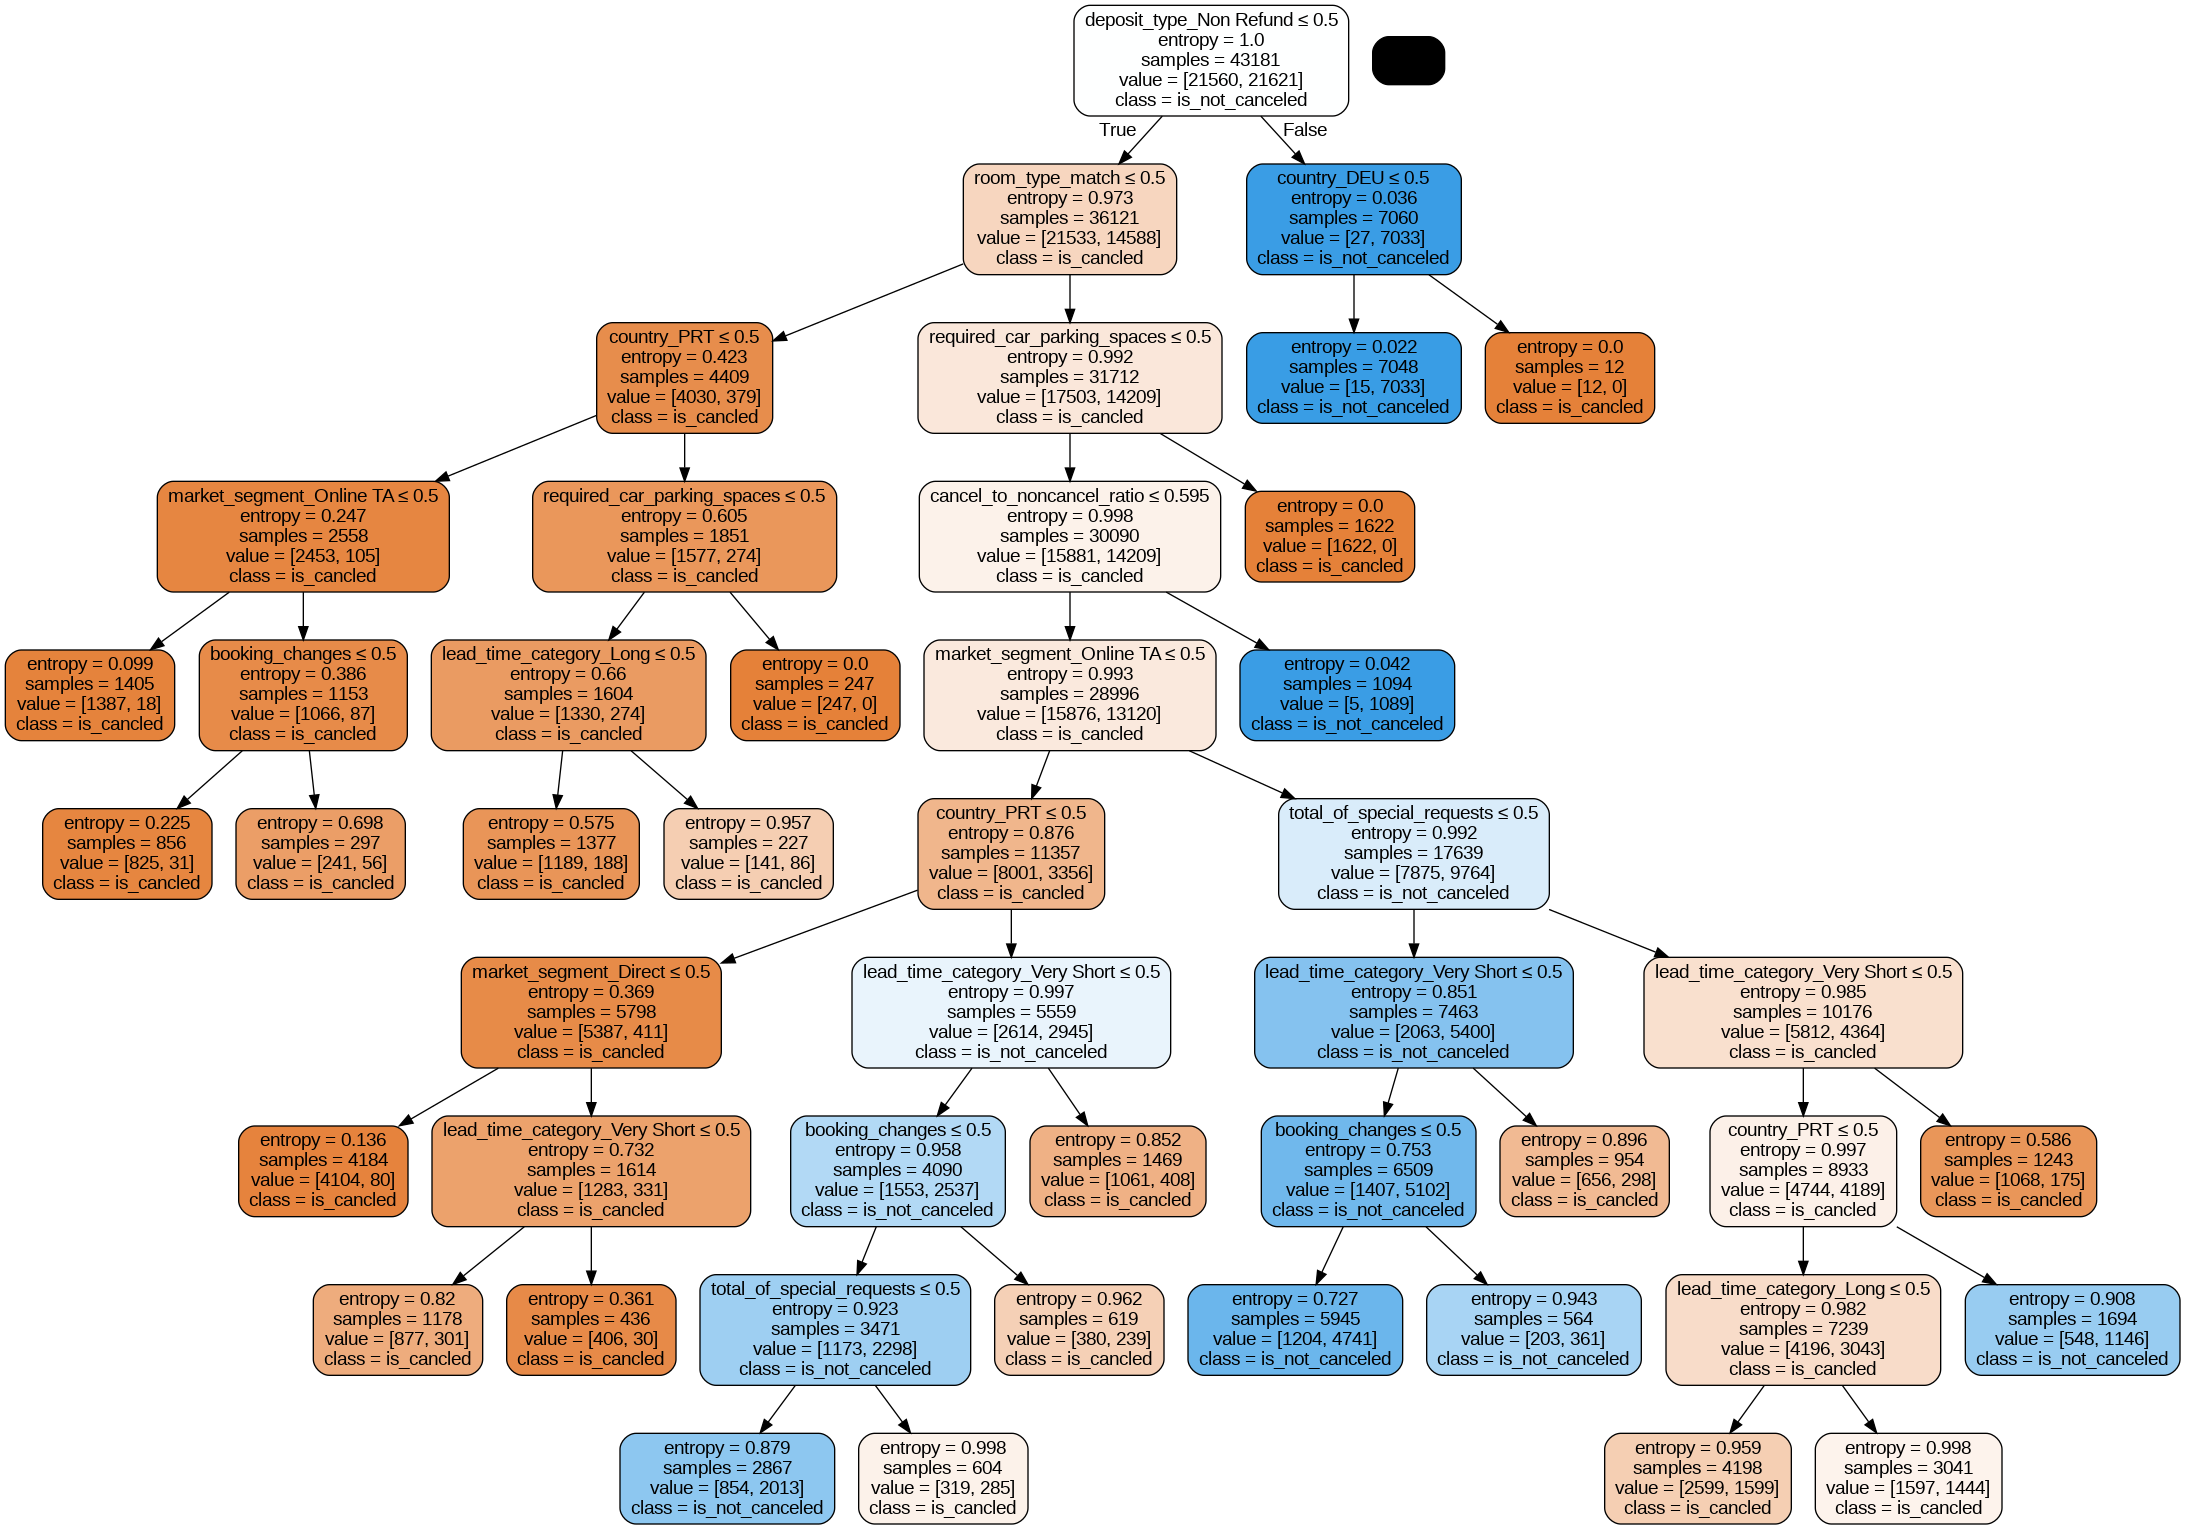

In [1216]:

dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=df_split_test2.columns.to_list(),
                class_names=['is_cancled','is_not_canceled'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



## » Optimizacion de parametros con Random Search -  Cross Validation (Modelo 3)

Seguimos utilizando lo mismo que el modelo 2

In [1217]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

#Cantidad de combinaciones que quiero porbar
n=10

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(5,50)),
               'min_samples_split': list(range(4,40)),
               'ccp_alpha':np.linspace(0.001,0.005,n),
               'max_depth':list(range(5,30))}

#Cantidad de splits para el Cross Validation
folds=15

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train1,y_train1);

In [1218]:
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'min_samples_split': 12, 'min_samples_leaf': 12, 'max_depth': 26, 'criterion': 'entropy', 'ccp_alpha': 0.002777777777777778}
0.8055894511732636


In [1219]:
randomcv.cv_results_['mean_test_score']

array([0.77008194, 0.75652221, 0.80026389, 0.80067952, 0.80543858,
       0.80200629, 0.80281092, 0.80558945, 0.80543858, 0.80026389])

In [1220]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df_split_train_dum2.drop(['id', 'is_canceled'], axis=1).values,
                                                     df_split_train2[target2].values,
                                                     test_size=0.2,
                                                     random_state=13,
                                                     stratify=df_split_train2[target2].values)


In [1221]:
#Entrenamiento con K Fold Cross Validation
from sklearn.model_selection import cross_validate, StratifiedKFold

# Spits que respeten la proporción delas clases
kfoldcv =StratifiedKFold(n_splits=15)

#Creo árbol con los mejores hiperparámetros
arbolcv3 = DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Selecciono métrica F1-Score
scorer_fn = make_scorer(f1_score)

#Hago CV
resultados = cross_validate(arbolcv3,x_train3, y_train3, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

metricsCV=resultados['test_score']
mejor_performance=resultados['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]


In [1222]:
resultados

{'fit_time': array([0.11810851, 0.1128788 , 0.12892985, 0.12023211, 0.11102629,
        0.12410688, 0.11409974, 0.12231207, 0.11167622, 0.10981178,
        0.10870361, 0.11559892, 0.11360002, 0.10871434, 0.10743427]),
 'score_time': array([0.00499105, 0.00574946, 0.00583601, 0.00512743, 0.00517321,
        0.0051744 , 0.00516129, 0.00592399, 0.00516438, 0.00519729,
        0.00514531, 0.00530529, 0.00550556, 0.00513911, 0.00535679]),
 'estimator': [DecisionTreeClassifier(ccp_alpha=0.002777777777777778, criterion='entropy',
                         max_depth=26, min_samples_leaf=12, min_samples_split=12),
  DecisionTreeClassifier(ccp_alpha=0.002777777777777778, criterion='entropy',
                         max_depth=26, min_samples_leaf=12, min_samples_split=12),
  DecisionTreeClassifier(ccp_alpha=0.002777777777777778, criterion='entropy',
                         max_depth=26, min_samples_leaf=12, min_samples_split=12),
  DecisionTreeClassifier(ccp_alpha=0.002777777777777778, criterion

In [1223]:
metricsCV


array([0.80012711, 0.81277672, 0.80025365, 0.81132075, 0.81577287,
       0.7997453 , 0.80808081, 0.79774577, 0.81178707, 0.80544132,
       0.80114906, 0.80559975, 0.80776456, 0.7991128 , 0.79949077])

Text(50.722222222222214, 0.5, 'True')

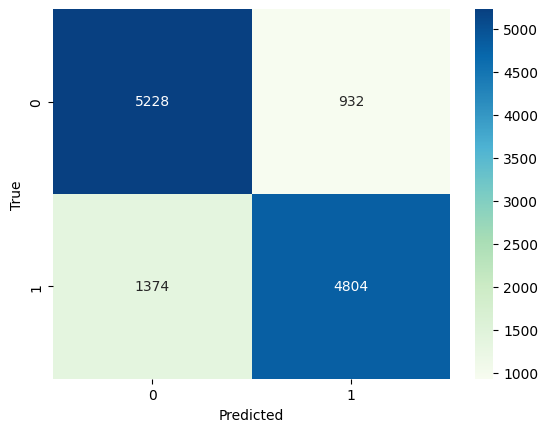

In [1224]:

model3 = arbolcv3.fit(X = x_train3, y = y_train3)
y_pred3 = model3.predict(x_test3)


tabla3 = confusion_matrix(y_test3, y_pred3)

sns.heatmap(tabla3,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [1225]:
mostrar_metricas(y_test3, y_pred3)

Accuracy: 0.8130977467985087
Recall: 0.7775979281320816
Precision: 0.8375174337517434
f1 score: 0.8064461977505456


In [1226]:
df_split_test3 = df_split_test_dum2.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids3 = df_split_test_dum2['id'].copy()

prediccion3 = mejor_performance.predict(df_split_test3)

df_prediccion3 = pd.DataFrame({'id': ids3, 'is_canceled': prediccion3})

df_resultado3 = pd.DataFrame(zip(ids3, prediccion3),columns=['id','is_canceled'])
# df_resultado3.to_csv('df_prediccion3.csv')
# files.download('df_prediccion3.csv')

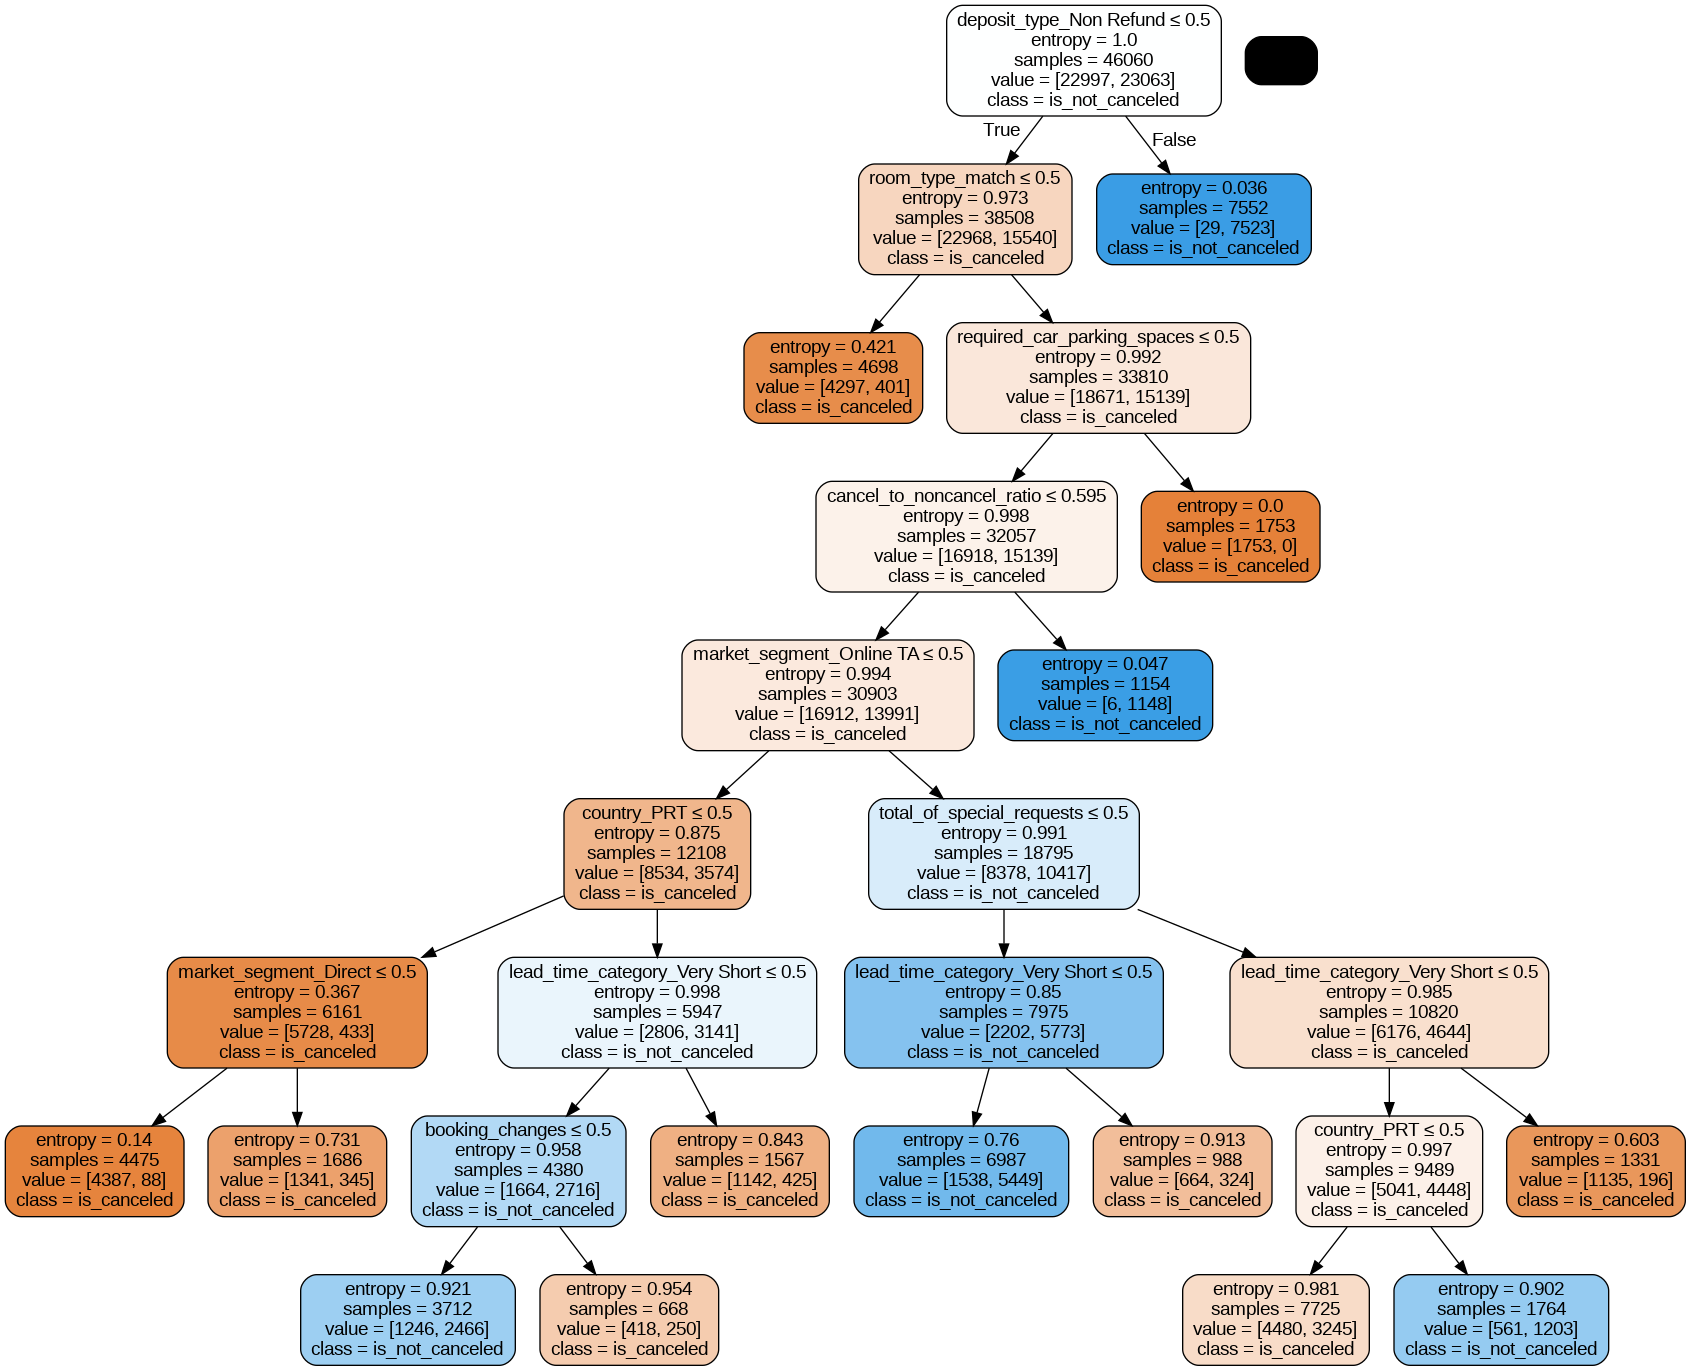

In [1227]:
#Grafico
dot_data = StringIO()
export_graphviz(mejor_performance, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=df_split_test3.columns.to_list(),
                class_names=['is_canceled','is_not_canceled'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())